# 0. Import packages

In [6]:
import numpy as np #for vectorized numerical calculations
import pandas as pd #for data handling
import seaborn as sns #for data visualization
import matplotlib.pyplot as plt #for data visualization
from sklearn import metrics #for metrics to evaluate the models
import torch #for tensor, gradient and neural network calculations

# 1. Get Data

In [7]:
#available at my drive (link is public) --> https://drive.google.com/file/d/1XFffn1YC91wvoDvnYjs3NIRSFF5zFPiK/view?usp=sharing
!gdown --id 1XFffn1YC91wvoDvnYjs3NIRSFF5zFPiK

/opt/conda/lib/python3.10/site-packages/gdown/cli.py:126: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(


Downloading...
From: https://drive.google.com/uc?id=1XFffn1YC91wvoDvnYjs3NIRSFF5zFPiK
To: /workspace/DeepLearning/lecture-2/Life Expectancy Data.csv
100%|████████████████████████████████████████| 333k/333k [00:00<00:00, 3.39MB/s]


Read Data

In [8]:
life_exp = pd.read_csv('Life Expectancy Data.csv')

Explore Data

In [9]:
life_exp.shape

(2938, 22)

In [10]:
life_exp.head() #shows first 5 elements

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [11]:
life_exp.info() #gives information about the fields

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [12]:
life_exp.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [16]:
sns.set(rc = {'figure.figsize':(15,10)})
sns.heatmap(life_exp.corr(), annot=True, cmap="coolwarm") #visualizing the correlation between the variables (how do they influence each other)

ValueError: could not convert string to float: 'Afghanistan'

Handling data

In [14]:
#Change column names for conveniency
life_exp.rename(columns = {" BMI " :"BMI",
  "Life expectancy ": "Life_expectancy",
  "Adult Mortality":"Adult_mortality",
  "infant deaths":"Infant_deaths",
  "percentage expenditure":"Percentage_expenditure",
  "Hepatitis B":"HepatitisB",
  "Measles ":"Measles",
  "under-five deaths ": "Under_five_deaths",
  "Total expenditure":"Total_expenditure",
  "Diphtheria ": "Diphtheria",
  " thinness 1–19 years":"Thinness_1–19_years",
  " thinness 5–9 years":"Thinness_5–9_years",
  " HIV/AIDS":"HIV/AIDS",
  "Income composition of resources":
  "Income_composition_of_resources"}, inplace = True)

In [15]:
X = life_exp.drop(["Status","Country","Life_expectancy"], axis=1)
Y = life_exp["Life_expectancy"]

In [17]:
X.head()

,Year,Adult_mortality,Infant_deaths,Alcohol,Percentage_expenditure,HepatitisB,Measles,BMI,Under_five_deaths,Polio,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income_composition_of_resources,Schooling
0,2015,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,2014,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,2013,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,2012,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,2011,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [18]:
Y.head()

0    65.0
1    59.9
2    59.9
3    59.5
4    59.2
Name: Life_expectancy, dtype: float64

Handling missing values

In [19]:
X.isnull().sum() #alias for isna -- checks the number of empty, nan, nat, ... elements

Year                                 0
Adult_mortality                     10
Infant_deaths                        0
Alcohol                            194
Percentage_expenditure               0
HepatitisB                         553
Measles                              0
BMI                                 34
Under_five_deaths                    0
Polio                               19
Total_expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income_composition_of_resources    167
Schooling                          163
dtype: int64

In [20]:
#There are many ways to fill missing values: https://www.geeksforgeeks.org/working-with-missing-data-in-pandas/
def fillmissing(df, feature, method):
  if method == "mode":
    df[feature] = df[feature].fillna(df[feature].mode()[0])
  elif method == "median":
    df[feature] = df[feature].fillna(df[feature].median())
  else:
    df[feature] = df[feature].fillna(df[feature].mean())

#We'll use the mean value
features_missing = X.columns[X.isna().any()]
for feature in features_missing:
  fillmissing(X, feature= feature, method= "mean")

#for Y we'll use the median value
Y.fillna(Y.median(), inplace=True)

In [21]:
Y = np.array(Y)

In [22]:
X.isnull().sum() #no more missing values

Year                               0
Adult_mortality                    0
Infant_deaths                      0
Alcohol                            0
Percentage_expenditure             0
HepatitisB                         0
Measles                            0
BMI                                0
Under_five_deaths                  0
Polio                              0
Total_expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income_composition_of_resources    0
Schooling                          0
dtype: int64

#**LINEAR REGRESSION**

#**2 . Linear Regression with Tim**

In [23]:
tim_data = X['BMI']
tim_data.head()

0    19.1
1    18.6
2    18.1
3    17.6
4    17.2
Name: BMI, dtype: float64

Visualzing Life expectancy vs BMI plot

Text(0, 0.5, 'Life expectancy')

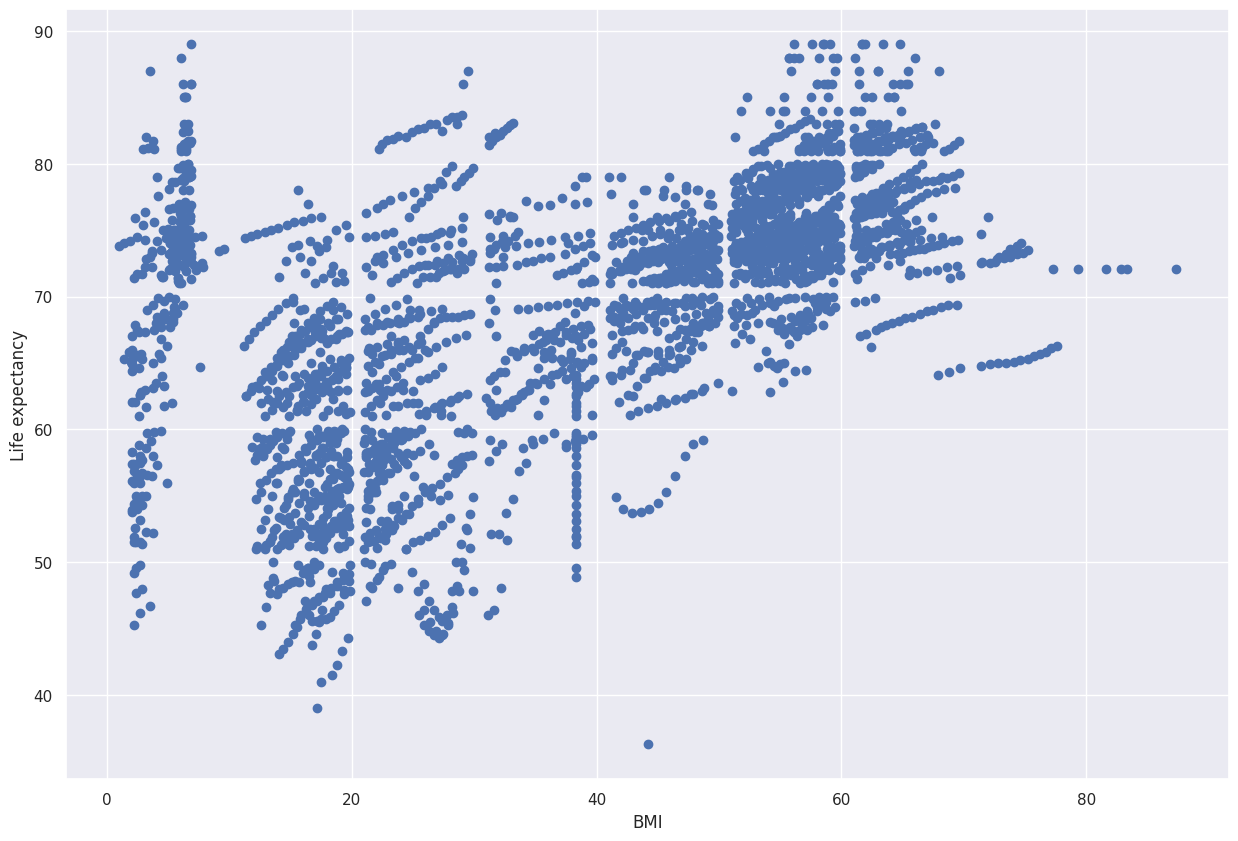

In [24]:
fig = plt.figure()
ax = fig.add_subplot()

ax.scatter(tim_data, Y)

ax.set_xlabel('BMI')
ax.set_ylabel('Life expectancy')

Preprocessing data

In [25]:
#tim_data.values.shape
tim_data.values.reshape(-1,1).shape

(2938, 1)

In [26]:
tim_data.values

array([19.1, 18.6, 18.1, ..., 26.3, 25.9, 25.5])

In [27]:
np.ones(len(tim_data)).reshape(-1,1).shape

(2938, 1)

In [28]:
np.ones(len(tim_data)).reshape(-1,1)

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]])

In [29]:
def preprocess(X):
    data = X.values.reshape(-1,1)
    data = np.concatenate((np.ones(len(data)).reshape(-1,1), data), axis=1)
    return data

tim_data_ready = preprocess(tim_data)
tim_data_ready.shape

(2938, 2)

In [30]:
tim_data_ready

array([[ 1. , 19.1],
       [ 1. , 18.6],
       [ 1. , 18.1],
       ...,
       [ 1. , 26.3],
       [ 1. , 25.9],
       [ 1. , 25.5]])

In [31]:
def normal_equation(X,Y):
    X = torch.from_numpy(X)
    Y = torch.from_numpy(Y)
    return torch.matmul( torch.inverse(torch.matmul(X.t(), X)), torch.matmul(X.t(), Y))

tim_theta = normal_equation(tim_data_ready, Y)
print(f'y = mx + b')
print(f'y = {tim_theta[1]}x + {tim_theta[0]}')

y = mx + b
y = 0.2674376847702364x + 58.98617203832172


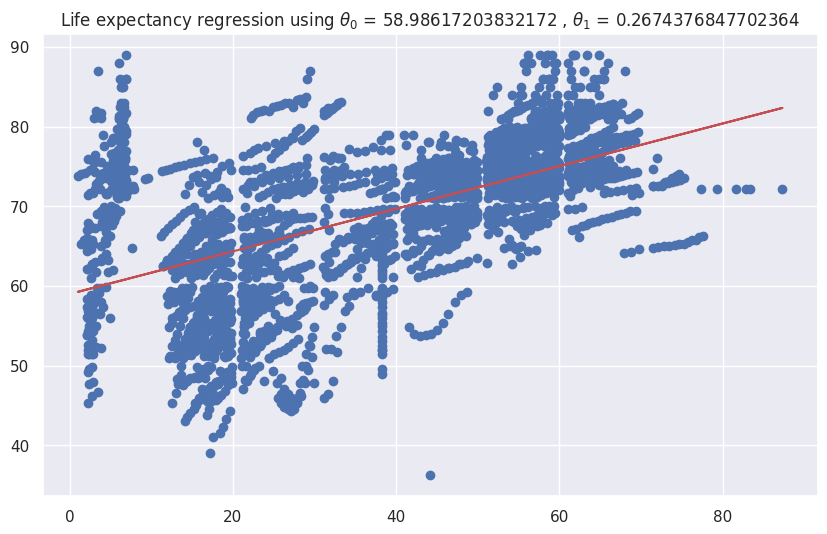

In [32]:
plt.figure(figsize=(10,6))
plt.title('Life expectancy regression using $\\theta_0$ = {} , $\\theta_1$ = {}'.format(tim_theta[0], tim_theta[1]))
plt.scatter(tim_data,Y, marker='o')
plt.plot(tim_data,np.dot(tim_data_ready, tim_theta), color='r')
plt.show()

In [33]:
def life_expectancy(X, theta):
    X = np.concatenate((np.ones(1),np.array(X)),axis=0)
    return round(np.dot(X, theta),1)

height = 1.82 #float(input("Please input your height (in meters): ")) #1.82
weight = 80 #float(input("Please input your weight (in kilograms): ")) #80
bmi = weight / height**2
print("BMI:",bmi)
life_exp_tim = life_expectancy([bmi], tim_theta)
print("Tim's life expectancy is", life_exp_tim , "years.")

BMI: 24.151672503320853
Tim's life expectancy is 65.4 years.


In [34]:
height = 1.80 #float(input("Please input your height (in meters): ")) #1.82
weight = 73 #float(input("Please input your weight (in kilograms): ")) #80
bmi = weight / height**2
print("BMI:",bmi)
life_exp_tim_tom = life_expectancy([bmi], tim_theta)
print("Tom's life expectancy predicted by Tim's model is", life_exp_tim_tom , "years.")

BMI: 22.530864197530864
Tom's life expectancy predicted by Tim's model is 65.0 years.


#**3.Linear Regression with Tom**

In [35]:
tom_data = X['GDP']
tom_data.head()

0    584.259210
1    612.696514
2    631.744976
3    669.959000
4     63.537231
Name: GDP, dtype: float64

Visualzing Life expectancy vs GDP plot

Text(0, 0.5, 'Life expectancy')

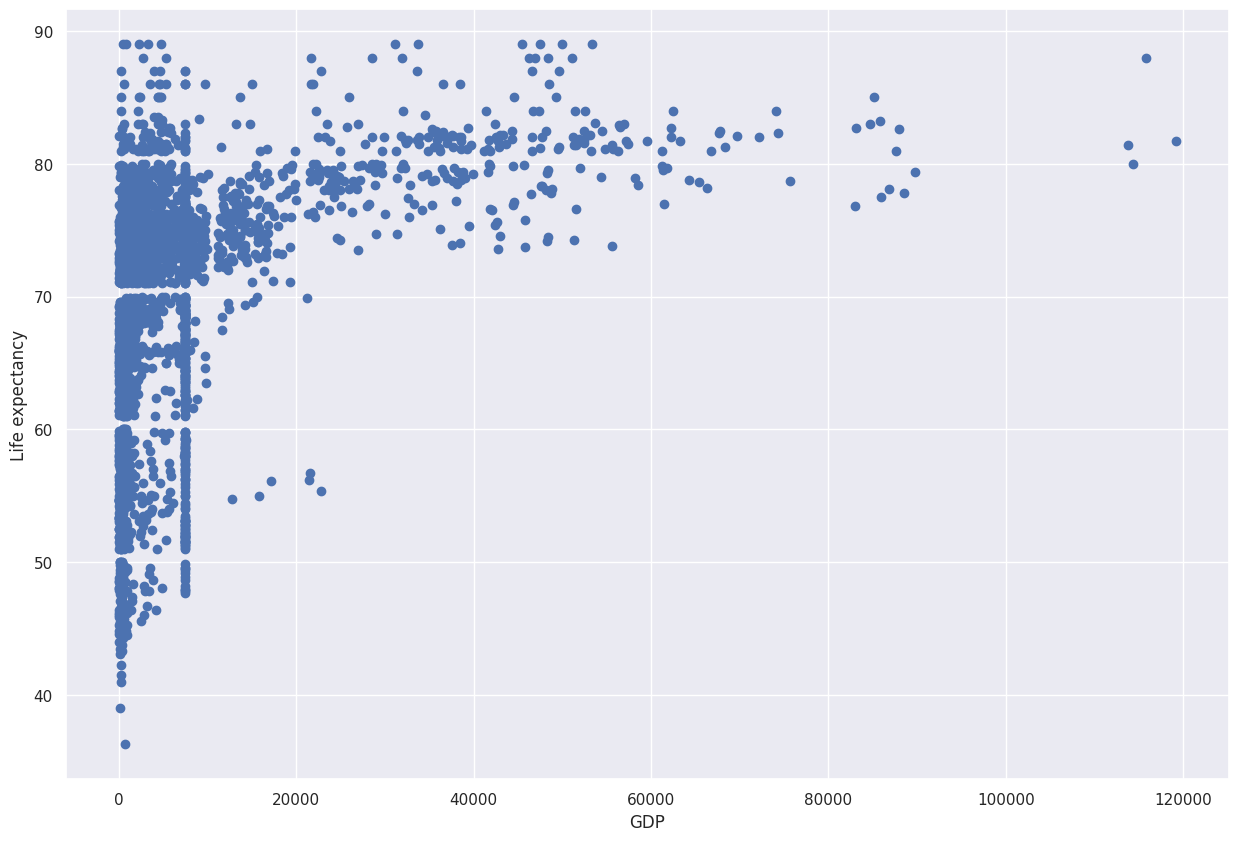

In [36]:
fig = plt.figure()
ax = fig.add_subplot()

ax.scatter(tom_data, Y)

ax.set_xlabel('GDP')
ax.set_ylabel('Life expectancy')

Preprocessing data

In [37]:
tom_data_ready = preprocess(tom_data)
tom_data_ready.shape

(2938, 2)

In [38]:
tom_theta = normal_equation(tom_data_ready, Y)
print(f'y = mx + b')
print(f'y = {tom_theta[1]}x + {tom_theta[0]}')

y = mx + b
y = 0.00031140962386767753x + 66.90438993067787


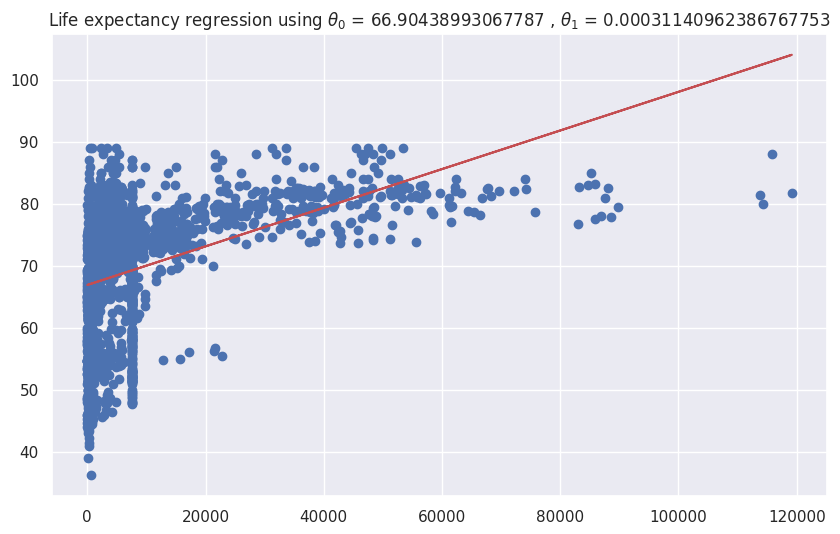

In [39]:
plt.figure(figsize=(10,6))
plt.title('Life expectancy regression using $\\theta_0$ = {} , $\\theta_1$ = {}'.format(tom_theta[0], tom_theta[1]))
plt.scatter(tom_data,Y, marker='o')
plt.plot(tom_data,np.dot(tom_data_ready, tom_theta), color='r')
plt.show()

In [40]:
def life_expectancy(X, theta):
    X = np.concatenate((np.ones(1),np.array(X)),axis=0)
    return round(np.dot(X, theta),1)

gdp = 8500 #float(input("Please input the GDP of your country: ")) #8500
life_exp_tom = life_expectancy([gdp], tom_theta)
print("Tom's life expectancy is", life_exp_tom , "years.")

Tom's life expectancy is 69.6 years.


In [41]:
gdp = 5000 #float(input("Please input the GDP of your country: ")) #8500
life_exp_tom_tim = life_expectancy([gdp], tom_theta)
print("Tim's life expectancy predicted by Tom is", life_exp_tom_tim , "years.")

Tim's life expectancy predicted by Tom is 68.5 years.


#**MULTIPLE REGRESSION**

#**4. Multiple Regression with Tim**

In [42]:
tim_data = X[['BMI', 'Adult_mortality', 'HIV/AIDS']]
tim_data.head()

,BMI,Adult_mortality,HIV/AIDS
0,19.1,263.0,0.1
1,18.6,271.0,0.1
2,18.1,268.0,0.1
3,17.6,272.0,0.1
4,17.2,275.0,0.1


In [43]:
def add_ones(X):
    return np.concatenate((np.ones(len(X)).reshape(-1,1), X), axis=1)

tim_data_ready = add_ones(tim_data)
tim_data_ready.shape

(2938, 4)

In [44]:
tim_theta = normal_equation(tim_data_ready, Y)
print(f'theta = {tim_theta}')

theta = tensor([ 6.9525e+01,  1.5869e-01, -3.3820e-02, -4.5804e-01],
       dtype=torch.float64)


In [45]:
def RMSE(y_pred, y):
    return np.sqrt(metrics.mean_squared_error(y, y_pred))

tim_y_pred = np.dot(tim_data_ready, tim_theta)
tim_rmse = RMSE(tim_y_pred, Y)

print("Tim's RMSE: ", tim_rmse)

Tim's RMSE:  5.784750918898877


In [46]:
#def life_expectancy(X, theta):
#    X = np.concatenate((np.ones(1),np.array(X)),axis=0)
#    return round(np.dot(X, theta),1)

height = 1.82 #float(input("Please input your height (in meters): "))
weight = 80 #float(input("Please input your weight (in kilograms): "))
bmi = weight / height**2
print("BMI:",bmi)
adult_mortality = 53
hiv = 0.1
life_exp_tim = life_expectancy([bmi,adult_mortality,hiv], tim_theta)
print("Tim's life expectancy is", life_exp_tim , "years.")

BMI: 24.151672503320853
Tim's life expectancy is 71.5 years.


In [47]:
height = 1.80 #float(input("Please input your height (in meters): "))
weight = 73 #float(input("Please input your weight (in kilograms): "))
bmi = weight / height**2
print("BMI:",bmi)
adult_mortality = 70
hiv = 0.1
life_exp_tim_tom = life_expectancy([bmi,adult_mortality,hiv], tim_theta)
print("Tom's life expectancy predicted by Tim is", life_exp_tim_tom , "years.")

BMI: 22.530864197530864
Tom's life expectancy predicted by Tim is 70.7 years.


#**5. Multiple Regression with Tom**

In [48]:
tom_data = X[['GDP', 'Income_composition_of_resources', 'Schooling']]
tom_data.head()

,GDP,Income_composition_of_resources,Schooling
0,584.259210,0.479,10.1
1,612.696514,0.476,10.0
2,631.744976,0.470,9.9
3,669.959000,0.463,9.8
4,63.537231,0.454,9.5


In [49]:
tom_data_ready = add_ones(tom_data)
tom_data_ready.shape

(2938, 4)

In [50]:
tom_theta = normal_equation(tom_data_ready, Y)
print(f'theta = {tom_theta}')

theta = tensor([4.4968e+01, 8.2688e-05, 1.4274e+01, 1.2249e+00], dtype=torch.float64)


In [51]:
def RMSE(y_pred, y):
    return np.sqrt(metrics.mean_squared_error(y, y_pred))

tom_y_pred = np.dot(tom_data_ready, tom_theta)
tom_rmse = RMSE(tom_y_pred, Y)

print("Tom's RMSE: ", tom_rmse)

Tom's RMSE:  6.288890108092894


In [52]:
gdp = 8500
income = 0.8
school = 16.5
life_exp_tom = life_expectancy([gdp,income,school], tom_theta)
print("Tom's life expectancy is", life_exp_tom , "years.")

Tom's life expectancy is 77.3 years.


In [53]:
gdp = 5000
income = 0.77
school = 15.5
life_exp_tom_tim = life_expectancy([gdp,income,school], tom_theta)
print("Tim's life expectancy predicted by Tom is", life_exp_tom_tim , "years.")

Tim's life expectancy predicted by Tom is 75.4 years.


In [ ]:
##CODE HERE

#**GRADIENT DESCENT**

Objective of Linear Regression is to minimize the cost function:
<br>
$\Large J(\theta) = \frac{1}{2m} \sum\limits_{i=1}^{m} (h_\theta(x^{(i)})-y^{(i)})^2$
<br>
<br>
where the hypothesis $h_\theta(x)$ is given by the lienar model:  

$\Large h_\theta(x) = \theta^T X = \theta_1 X_1 + \theta_0 $  
<br>
In batch gradient descent, each iteration performs the update:  
$\Large \theta_j := \theta_j - \alpha \frac{1}{m} \sum\limits_{i=1}^{m}(h_\theta (x^{(i)}) - y^{(i)})x_j^{(i)}$

In [54]:
tom_data.shape

(2938, 3)

In [55]:
tom_features = tom_data.values

In [56]:
#Normalize features
def featureNormalize(x_m):
    mu = np.zeros((1,x_m.shape[1]))
    sigma = np.zeros((1,x_m.shape[1]))
    x_norm = x_m.astype(float)

    for i in range(0,len(mu)+1):
        mu[:,i] = x_m[:,i].mean()
        sigma[:,i] = x_m[:,i].std()
        x_norm[:,i] = (x_m[:,i] - mu[:,i])/sigma[:,i]
    return (x_norm, mu, sigma)

x_norm, mu, sigma = featureNormalize(tom_features)
x_norm = np.concatenate((np.ones(len(x_norm)).reshape(-1,1), x_norm), axis=1)

In [57]:
def computeCost_m(x, y, theta):
    m = len(y)
    h_x = np.dot(x, theta)
    j = np.sum(np.square(h_x - y))/(2*m)
    return j

def gradientDescentMulti(X, Y, theta, alpha, num_iters):
    m = len(Y)
    p = np.copy(X)
    t = np.copy(theta)
    j = []
    print('Running Gradient Descent')
    for i in range(0,num_iters+1):
        cost = computeCost_m(p, Y, t)
        j.append(cost)
        #print(f'Cost at iteration {i}: {cost}')
        h_x = np.dot(p, t)
        err = h_x - Y
        for f in range(theta.size):
            t[f] = t[f] - alpha/m *(np.sum((np.dot(p[:,f].T, err))))
    return j, t

In [58]:
alpha = 0.000001
num_iters = 10
theta_init = np.random.rand(4,1)

In [59]:
cost, theta_final = gradientDescentMulti(x_norm, Y, theta_init, alpha, num_iters)
print("")
print("Final theta:")
print(theta_final)

Running Gradient Descent

Final theta:
[[ 0.81045979]
 [ 0.14618662]
 [-0.30675753]
 [ 5.31024762]]


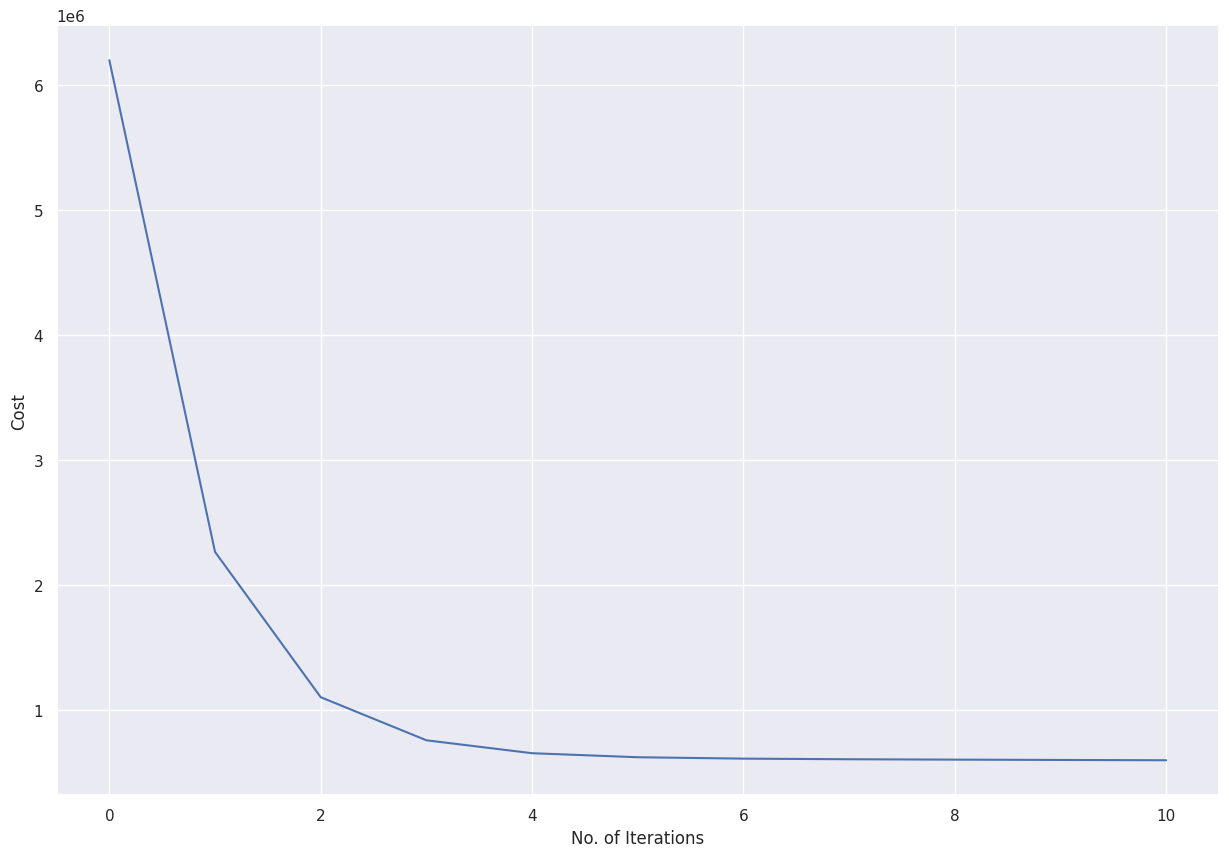

In [60]:
plt.figure()
plt.plot(cost)
plt.xlabel('No. of Iterations')
plt.ylabel('Cost')
plt.show()

In [61]:
def RMSE(y, y_pred):
    return np.sqrt(metrics.mean_squared_error(y, y_pred))

tom_y_pred = np.dot(x_norm, theta_final)
tom_rmse = RMSE(tom_y_pred, Y)

print("Tom's RMSE: ", tom_rmse)

Tom's RMSE:  13.207905722417376


In [ ]:
## To be continued...